In [1]:
import gym
from keras.optimizers import Adam

/usr/local/anaconda5/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/usr/local/anaconda5/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
import base
from src.agents import DeepQAgent
from src.util import JupyterCallback
from src.downsamplers import downsample_space_invaders

# Environment

In [3]:
# v4 disables the 25% chance of the emulator ignoring the input action and 
# repeating the last action instead.
env = gym.make('SpaceInvaders-v4')

In [4]:
env.observation_space

Box(210, 160, 3)

In [5]:
env.action_space

Discrete(6)

# Agent

In [6]:
agent = DeepQAgent(env, downsample_space_invaders,
    replay_memory_size=250000,
    optimizer=Adam(lr=1e-4),
    render_mode='rgb_array'
)
agent

DeepQAgent(
    env=<TimeLimit<AtariEnv<SpaceInvaders-v4>>>,
    downsample=Downsampler(y=(0, 15), x=(0, 1), cut=[]),
    replay_memory_size=250000,
    agent_history_length=4,
    discount_factor=0.99,
    update_frequency=4,
    optimizer=<keras.optimizers.Adam object at 0x2b4aab89e2e8>,
    exploration_rate=AnnealingVariable(initial_value=1.0, final_value=0.1, steps=1000000),
    null_op_max=30,
    null_op=0,
    loss=<function huber_loss at 0x2b4abf14a1e0>,
    image_size=(84, 84),
    render_mode='rgb_array'
)

In [7]:
res_random = agent.play(games=30)
res_random

100%|██████████| 30/30 [00:56<00:00,  1.89s/game]


array([15., 12., 10., 11., 17., 11.,  6., 13., 22., 13., 24., 11., 16.,
       10.,  8., 14., 18., 19., 13., 21., 16., 14., 17., 16., 10., 19.,
       12., 19., 14., 11.])

In [8]:
res_random.mean()

14.4

In [9]:
agent.observe(50000)

100%|██████████| 50000/50000 [00:40<00:00, 1228.81frame/s]


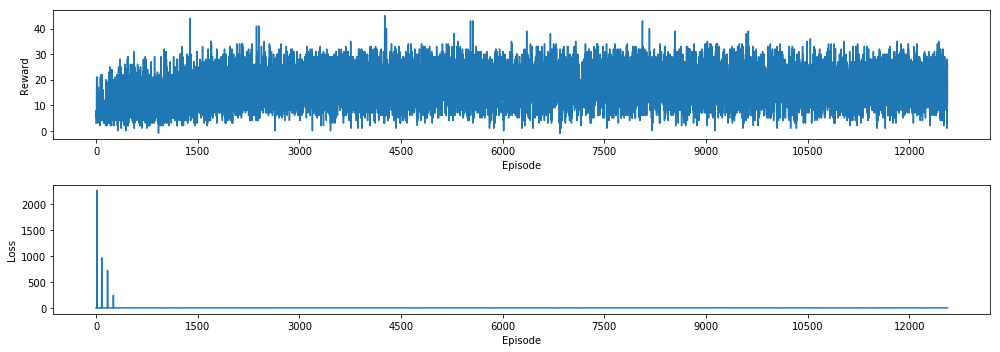

100%|██████████| 10000000/10000000 [16:10:38<00:00, 155.21frame/s]


In [10]:
callback = JupyterCallback()
agent.train(frames_to_play=10000000, callback=callback)

In [11]:
res_trained = agent.play(games=30)
res_trained

100%|██████████| 30/30 [00:49<00:00,  1.64s/game]


array([21., 10., 17., 17., 19., 19., 14., 19., 15., 17., 15.,  7., 18.,
       27., 16., 12., 16., 14., 13., 15., 11.,  7., 15., 14., 11., 19.,
       11., 13., 17., 30.])

In [12]:
res_trained.mean()

15.633333333333333

In [13]:
!mkdir -p models
!mkdir -p models/dqn

In [14]:
agent.model.save_weights('./models/dqn/space_invaders-nondeterministic.h5', overwrite=True)